In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#train = pd.read_csv('Train.csv')
#test = pd.read_csv('Test.csv')
#sub = pd.read_csv('sample_submission.csv')
var_des = pd.read_csv('VariableDefinitions.csv')

In [3]:
var_des[2:]

,Variable Definitions,Unnamed: 1,Unnamed: 2
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income
10,DATA_VOLUME,nombre de connexions,number of connections
11,ON_NET,appel inter expresso,inter expresso call


In [6]:
train_ = train.copy()
test_ = test.copy()
sub_ = sub.copy()

In [7]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
user_id           400000 non-null object
REGION            242480 non-null object
TENURE            400000 non-null object
MONTANT           259723 non-null float64
FREQUENCE_RECH    259723 non-null float64
REVENUE           265337 non-null float64
ARPU_SEGMENT      265337 non-null float64
FREQUENCE         265337 non-null float64
DATA_VOLUME       203146 non-null float64
ON_NET            254181 non-null float64
ORANGE            233683 non-null float64
TIGO              160614 non-null float64
ZONE1             31690 non-null float64
ZONE2             25513 non-null float64
MRG               400000 non-null object
REGULARITY        400000 non-null int64
TOP_PACK          232671 non-null object
FREQ_TOP_PACK     232671 non-null float64
CHURN             400000 non-null int64
dtypes: float64(12), int64(2), object(5)
memory usage: 58.0+ MB


In [8]:
df = pd.concat([train_, test_], axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 99999
Data columns (total 19 columns):
ARPU_SEGMENT      331847 non-null float64
CHURN             400000 non-null float64
DATA_VOLUME       253808 non-null float64
FREQUENCE         331847 non-null float64
FREQUENCE_RECH    324772 non-null float64
FREQ_TOP_PACK     290968 non-null float64
MONTANT           324772 non-null float64
MRG               500000 non-null object
ON_NET            317798 non-null float64
ORANGE            292483 non-null float64
REGION            303187 non-null object
REGULARITY        500000 non-null int64
REVENUE           331847 non-null float64
TENURE            500000 non-null object
TIGO              200826 non-null float64
TOP_PACK          290968 non-null object
ZONE1             39370 non-null float64
ZONE2             31935 non-null float64
user_id           500000 non-null object
dtypes: float64(13), int64(1), object(5)
memory usage: 76.3+ MB


In [10]:
df.apply(lambda x: x.nunique())

ARPU_SEGMENT       11694
CHURN                  2
DATA_VOLUME        24333
FREQUENCE             91
FREQUENCE_RECH       115
FREQ_TOP_PACK        178
MONTANT             2773
MRG                    1
ON_NET              6489
ORANGE              2218
REGION                14
REGULARITY            62
REVENUE            25510
TENURE                 8
TIGO                 872
TOP_PACK             112
ZONE1                345
ZONE2                280
user_id           500000
dtype: int64

In [11]:
df['MRG'].value_counts()

NO    500000
Name: MRG, dtype: int64

In [12]:
#df['TOP_PACK'].sample(20)

In [13]:
"""data=[]
for i in len(df['TOP_PACK']):
    if 'Data' in df['TOP_PACK']:
        
        data.append(i)"""

"data=[]\nfor i in len(df['TOP_PACK']):\n    if 'Data' in df['TOP_PACK']:\n        \n        data.append(i)"

In [14]:
#len(data)

In [15]:
df['TENURE'].value_counts()

K > 24 month     474264
I 18-21 month     10425
H 15-18 month      6069
G 12-15 month      3488
J 21-24 month      2902
F 9-12 month       2215
E 6-9 month         444
D 3-6 month         193
Name: TENURE, dtype: int64

In [16]:
#df['FREQ_TOP_PACK'].value_counts()

In [17]:
df_ = df.drop(columns=['ZONE2','MRG','user_id','ZONE1'])

In [18]:
df_.apply(lambda x: x.nunique())

ARPU_SEGMENT      11694
CHURN                 2
DATA_VOLUME       24333
FREQUENCE            91
FREQUENCE_RECH      115
FREQ_TOP_PACK       178
MONTANT            2773
ON_NET             6489
ORANGE             2218
REGION               14
REGULARITY           62
REVENUE           25510
TENURE                8
TIGO                872
TOP_PACK            112
dtype: int64

In [19]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 99999
Data columns (total 15 columns):
ARPU_SEGMENT      331847 non-null float64
CHURN             400000 non-null float64
DATA_VOLUME       253808 non-null float64
FREQUENCE         331847 non-null float64
FREQUENCE_RECH    324772 non-null float64
FREQ_TOP_PACK     290968 non-null float64
MONTANT           324772 non-null float64
ON_NET            317798 non-null float64
ORANGE            292483 non-null float64
REGION            303187 non-null object
REGULARITY        500000 non-null int64
REVENUE           331847 non-null float64
TENURE            500000 non-null object
TIGO              200826 non-null float64
TOP_PACK          290968 non-null object
dtypes: float64(11), int64(1), object(3)
memory usage: 61.0+ MB


In [46]:
#test_df = df_[:1000]

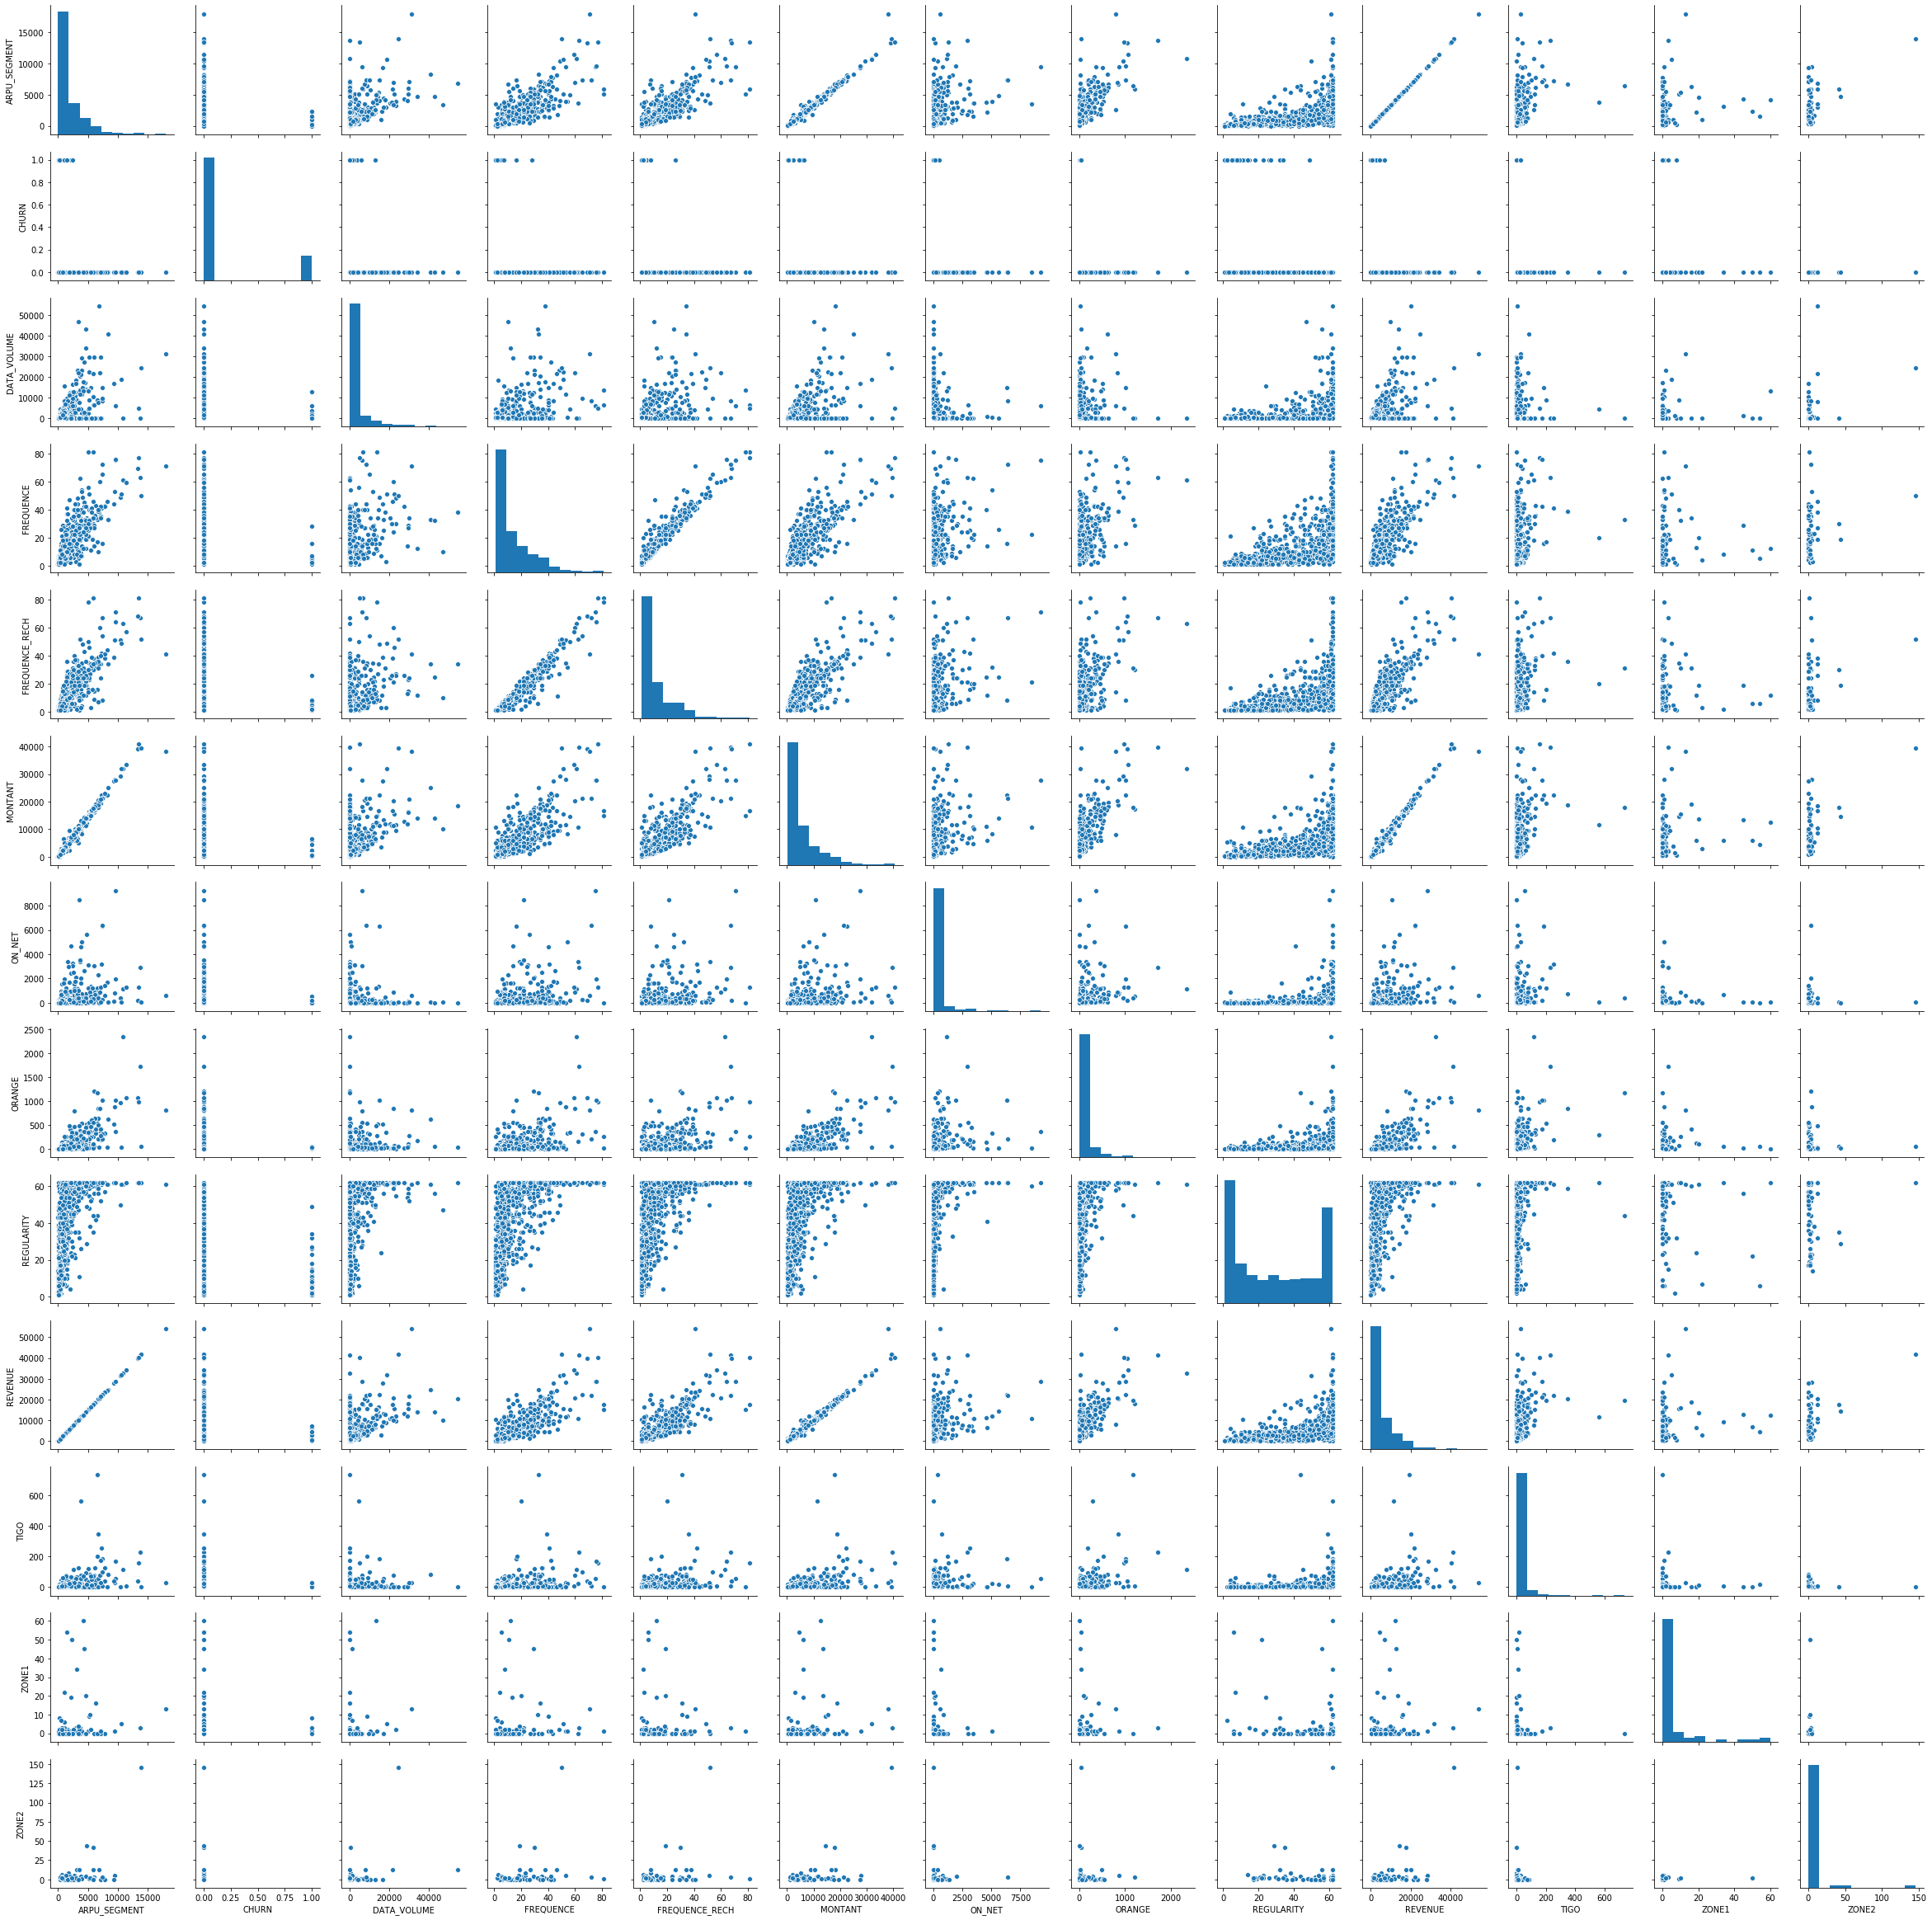

In [47]:
#sns.pairplot(test_df)

In [20]:
df_.isnull().sum()/len(df) *100

ARPU_SEGMENT      33.6306
CHURN             20.0000
DATA_VOLUME       49.2384
FREQUENCE         33.6306
FREQUENCE_RECH    35.0456
FREQ_TOP_PACK     41.8064
MONTANT           35.0456
ON_NET            36.4404
ORANGE            41.5034
REGION            39.3626
REGULARITY         0.0000
REVENUE           33.6306
TENURE             0.0000
TIGO              59.8348
TOP_PACK          41.8064
dtype: float64

In [21]:
cat_cols = df_.select_dtypes(include='object').columns
num_cols = df_.select_dtypes(exclude='object').columns


In [55]:
cat_cols

Index(['REGION', 'TENURE'], dtype='object')

In [58]:
df_['REGION'].fillna('DAKAR', inplace=True)

In [60]:
df_.describe()

,ARPU_SEGMENT,CHURN,DATA_VOLUME,FREQUENCE,FREQUENCE_RECH,MONTANT,ON_NET,ORANGE,REGULARITY,REVENUE,TIGO,ZONE1,ZONE2
count,331847.000000,400000.00000,253808.00000,331847.000000,324772.000000,324772.000000,317798.000000,292483.000000,500000.000000,331847.000000,200826.000000,39370.000000,31935.000000
mean,1836.026678,0.18711,3367.30120,13.957474,11.512008,5527.506398,276.608833,95.405846,28.061688,5508.063984,23.199621,7.971628,7.285768
std,2392.062630,0.39000,11950.10039,14.675127,13.274654,7104.512092,873.029153,204.179036,22.291043,7176.201893,63.855683,36.710581,28.109362
min,0.000000,0.00000,0.00000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,333.000000,0.00000,0.00000,3.000000,2.000000,1000.000000,5.000000,7.000000,6.000000,1000.000000,2.000000,0.000000,0.000000
50%,1000.000000,0.00000,267.00000,9.000000,7.000000,3000.000000,27.000000,29.000000,24.000000,3000.000000,6.000000,1.000000,2.000000
75%,2450.000000,0.00000,2925.00000,19.000000,16.000000,7300.000000,156.000000,99.000000,51.000000,7350.000000,20.000000,3.000000,5.000000
max,77804.000000,1.00000,934576.00000,91.000000,133.000000,226550.000000,45011.000000,6788.000000,62.000000,233413.000000,3083.000000,1657.000000,1017.000000


In [1]:
df_.info()

NameError: name 'df_' is not defined

In [ ]:
df_.drop(columns=[])

In [6]:
even = []
odd = []

for i in range(1,101):
    if i%2==0:
        even.append(i)
    else:
        odd.append(i)

print(even)
print('='*79)
print(odd)

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100]
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
